In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
%matplotlib inline 

In [187]:
data = pd.read_json("logins.json")

In [175]:
df = pd.read_json("logins.json")

In [129]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [130]:
data['num'] = np.arange(0,len(data['login_time']))

In [153]:
data.head(20)

,num
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4
1970-01-01 20:21:41,5
1970-01-01 20:12:16,6
1970-01-01 20:35:47,7
1970-01-01 20:35:38,8


In [132]:
data.set_index('login_time',inplace=True)

In [133]:
data.index = pd.to_datetime(data.index)

In [137]:
df1 = data.resample(rule='15T').sum()

In [154]:
df1.head(10)

,num
login_time,
1970-01-01 20:00:00,6.0
1970-01-01 20:15:00,25.0
1970-01-01 20:30:00,113.0
1970-01-01 20:45:00,132.0
1970-01-01 21:00:00,25.0
1970-01-01 21:15:00,105.0
1970-01-01 21:45:00,124.0
1970-01-01 22:00:00,334.0
1970-01-01 22:15:00,361.0


In [155]:
df1 = df1.dropna()

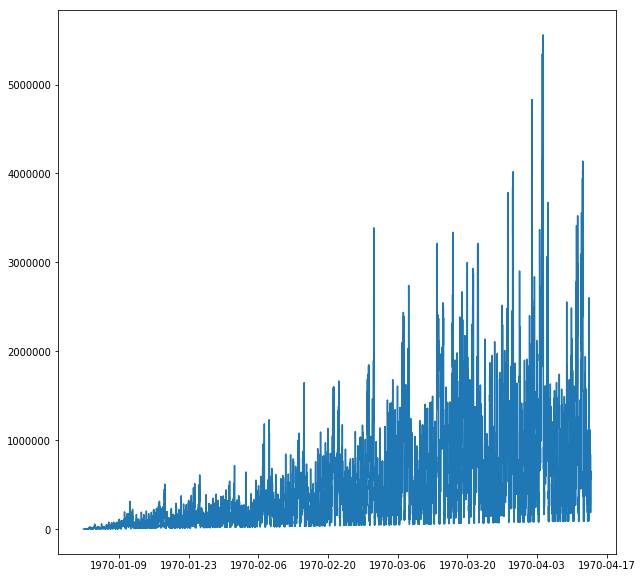

In [170]:
plt.figure(figsize=(10,10))
plt.plot(df1)

In [5]:
#data2 = pd.read_json("ultimate_data_challenge.json",orient='records')
import json

openfile=open("ultimate_data_challenge.json")
jsondata=json.load(openfile)
df=pd.DataFrame(jsondata)

In [6]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [9]:
df.drop(['phone'],axis = 1 , inplace=True)


In [10]:
df.dropna(how='any',inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 11 columns):
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
city                      41744 non-null object
last_trip_date            41744 non-null object
signup_date               41744 non-null object
surge_pct                 41744 non-null float64
trips_in_first_30_days    41744 non-null int64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 3.5+ MB


In [12]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

df['months_retained'] = (df['last_trip_date'] - df['signup_date']).dt.days / 30


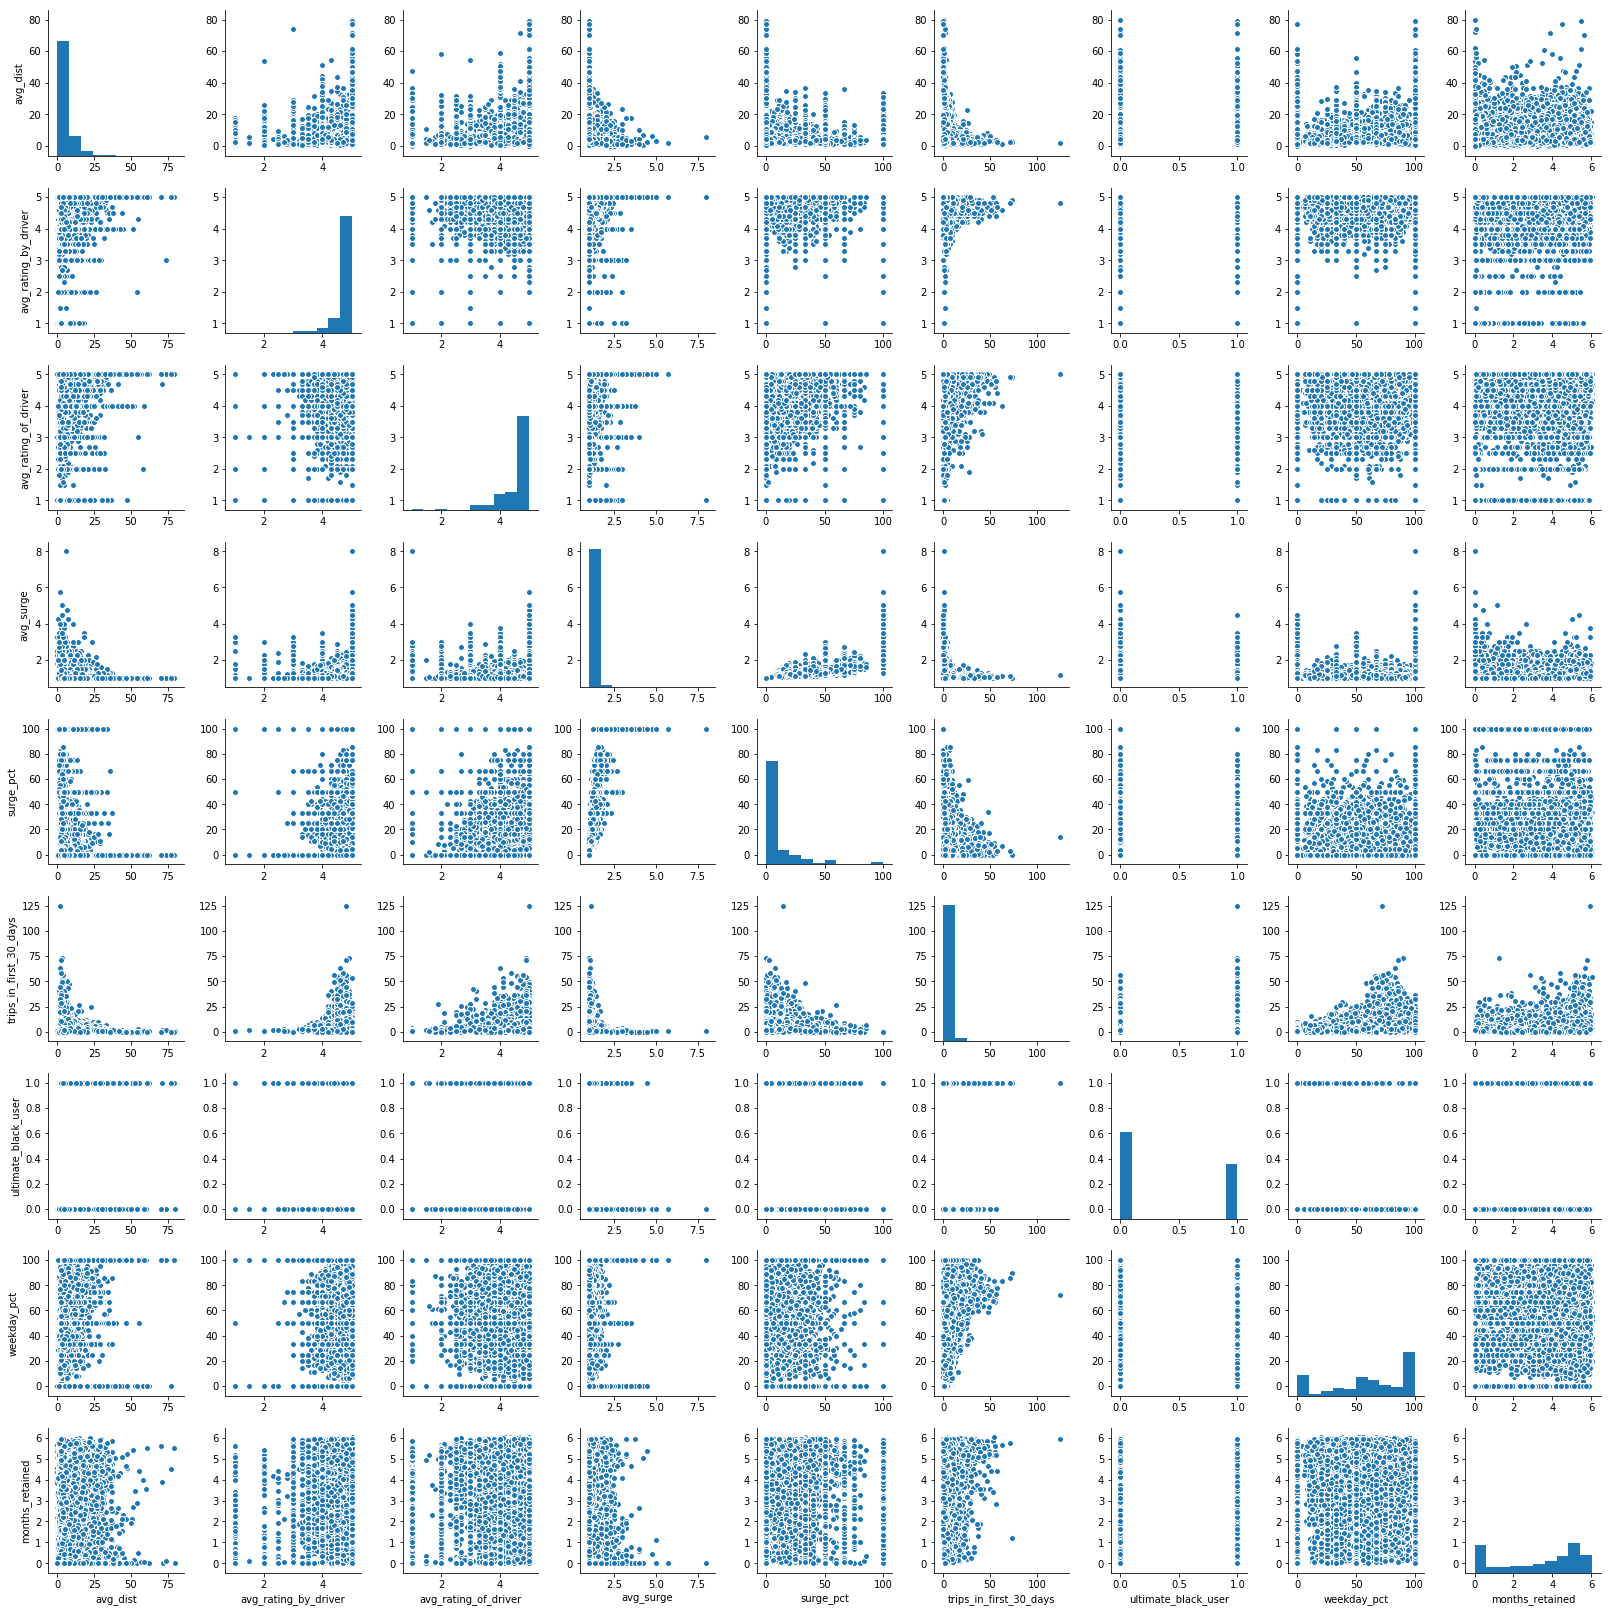

In [13]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [14]:
df.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,months_retained
avg_dist,1.000000,0.083869,0.034806,-0.085768,-0.111075,-0.136301,0.026552,0.102703,-0.110686
avg_rating_by_driver,0.083869,1.000000,0.123175,0.012171,0.019316,-0.045916,0.005553,0.019141,-0.048657
avg_rating_of_driver,0.034806,0.123175,1.000000,-0.022229,-0.001822,-0.011546,-0.002628,0.013673,-0.017432
avg_surge,-0.085768,0.012171,-0.022229,1.000000,0.795758,-0.000306,-0.071582,-0.118818,-0.013630
surge_pct,-0.111075,0.019316,-0.001822,0.795758,1.000000,0.005371,-0.100878,-0.154953,0.007608
trips_in_first_30_days,-0.136301,-0.045916,-0.011546,-0.000306,0.005371,1.000000,0.115334,0.054933,0.157306
ultimate_black_user,0.026552,0.005553,-0.002628,-0.071582,-0.100878,0.115334,1.000000,0.033930,0.183450
weekday_pct,0.102703,0.019141,0.013673,-0.118818,-0.154953,0.054933,0.033930,1.000000,0.015797
months_retained,-0.110686,-0.048657,-0.017432,-0.013630,0.007608,0.157306,0.183450,0.015797,1.000000


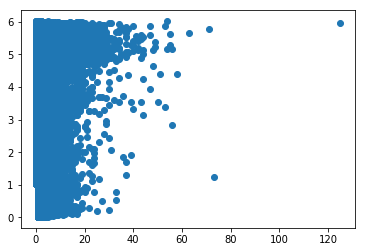

In [15]:
plt.scatter(df['trips_in_first_30_days'],df['months_retained'])

In [17]:
df[df['months_retained']>=.6]['trips_in_first_30_days'].count()


33430

In [18]:
33430/41744

0.8008336527405137

In [ ]:
out of 417444 entries available 33430 entries are for those who have worked for the company for more than 6 months which 
suggest that situation is not dire in terms of attrition since 80 percent of the workforce completes 6 or more months . 

In terms of predicting whether person would stay in the company for more that 6 months as per our analysis count for first
6 months trips might help however corrleation is very low close to .15 and none of the other features come close . 

## Linear regression model 

In [19]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'months_retained'],
      dtype='object')

In [20]:
X = df['trips_in_first_30_days']
y = df['months_retained']

In [28]:
X = X.reshape(-1,1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print(lm.intercept_)

3.04649985654


In [39]:
predictions = lm.predict(X_test)

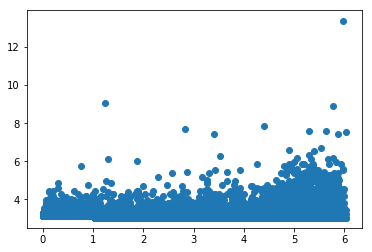

In [40]:
plt.scatter(y_test,predictions)

In [41]:
from sklearn import metrics

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.77881613299
MSE: 4.04351444011
RMSE: 2.01084918383
